# 로지스틱 회귀 (Logistic Regression )
`04_logistic_regression.ipynb`

In [2]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [7]:
fish_df = pd.read_csv('./fish_data.csv')
fish_df.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [15]:
# 데이터셋 분리
X = fish_df[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
y = fish_df['Species'].to_numpy()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
len(X_train)


119

In [16]:
# 스케일링 (훈련 셋에서 사용한 기준으로 테스트셋을 스케일링 해야함!)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [38]:
from sklearn.neighbors import KNeighborsClassifier

# 주변 3개의 생선을 보고 확률을 계산
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(X_train, y_train)

kn.score(X_train, y_train), kn.score(X_test, y_test)

(0.8907563025210085, 0.85)

In [39]:
# KN분류기가 분류해내는 클래스 목록
print(kn.classes_)
# 테스트셋에서 앞 5개 데이터를 예측해라
print(kn.predict(X_test[:5]))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [59]:
# 테스트 데이터 5개가 특정 생선일 확률
kn.predict_proba(X_test[:5])

array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.]])

## 로지스틱 회귀
확률을 구할 때 시그모이드 함수를 사용해서 0~1로 변환

### 로지스틱 회귀로 이진분류 (빙어, 도미)

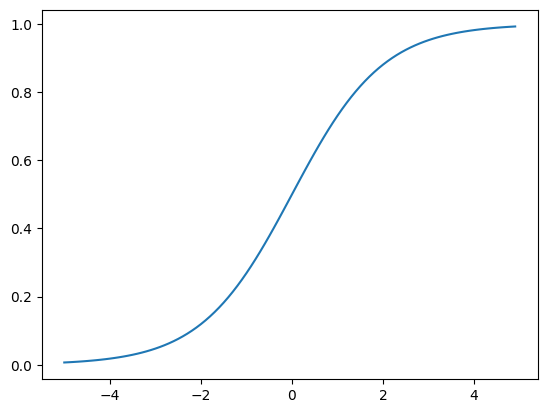

In [ ]:
import matplotlib.pyplot as plt

# 시그모이드 함수(모든 x를 0 ~ 1 사이 값으로 변환)
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ss = StandardScaler()
ss.fit(X_train)
X_train_s = ss.transform(X_train)
X_test_s = ss.transform(X_test)


index = (y_train == 'Bream') | (y_train == 'Smelt')

X_bream_smelt_train = X_train_s[index]
y_bream_smelt_train = y_train[index]

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream' 'Smelt' 'Smelt' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream'
 'Smelt' 'Smelt' 'Bream' 'Smelt' 'Bream' 'Bream']


In [80]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
# 로지스틱회귀 학습 -> 방정식 만들기 -> 두개중 하나로 분류해야 함 -> abc순 뒤에걸로 분류할 점수를 계산하는 식
lr.fit(X_bream_smelt_train, y_bream_smelt_train)
print(f'=== 방정식 기울기, 절편 결과 : {lr.coef_} / {lr.intercept_}')
# 분류하는 클래스 명
print(f'\n 분류해낼 클래스 두개 (abc순) -> {lr.classes_}')

# 도미/빙어 예측 결과
print(lr.predict(X_bream_smelt_train[:5]))
print(lr.score(X_bream_smelt_train, y_bream_smelt_train))

# 실제 z값
descions = lr.decision_function(X_bream_smelt_train[:5])
print(f'\n=== 실제z값 ===')
print(descions)

# 직접 시그모이드 통과시키기
from scipy.special import expit
print('\n=== 시그모이드 함수 통과 후 값 (직접확인) ===')
print(expit(descions))

# 바로 계산된 결과
print('\n=== lr 이 바로 계산해준 값 ===')
print(lr.predict_proba(X_bream_smelt_train[:5]))



=== 방정식 기울기, 절편 결과 : [[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] / [-2.16172774]

 분류해낼 클래스 두개 (abc순) -> ['Bream' 'Smelt']
['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
1.0

=== 실제z값 ===
[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]

=== 시그모이드 함수 통과 후 값 (직접확인) ===
[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]

=== lr 이 바로 계산해준 값 ===
[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


### 로지스틱 회귀로 다중분류 (생선 7종)

In [ ]:
# 소프트맥스 함수

In [82]:
# 2진분류 vs 다중분류 에 따라 내부 동작이 다름

# C=규제, max_iter=반복횟수의 제한
lr = LogisticRegression(C=20, max_iter=1000)

lr.fit(X_train_s, y_train)
# 훈련, 테스트 점수
print(lr.score(X_train_s, y_train))
print(lr.score(X_test_s, y_test))

0.9327731092436975
0.925


In [86]:
print(lr.predict(X_test_s[:5]))

# 분류의 근거 (확률)
print(lr.classes_)
print(np.round(lr.predict_proba(X_test_s[:5]), decimals=3))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
# 각 생선별 z값 구하는 함수의 계수 확인
lr.coef_

array([[-1.50605455, -1.03747913,  2.60919713,  7.69422739, -1.18603342],
       [ 0.19200047, -1.99988812, -3.79617725,  6.50312639, -2.00022754],
       [ 3.55793539,  6.36988929, -8.52233732, -5.75397233,  3.79233438],
       [-0.11453308,  3.61060121,  3.94464503, -3.62243904, -1.7598168 ],
       [-1.40843717, -6.09242191,  5.28629633, -0.86696569,  1.84518455],
       [-1.33419952,  1.48153392,  1.38217547, -5.6602348 , -4.39228963],
       [ 0.61328846, -2.33223527, -0.90379939,  1.70625807,  3.70084846]])

In [92]:
decisions = lr.decision_function(X_test_s[:5])
np.round(decisions, decimals=2)

array([[ -6.51,   1.04,   5.17,  -2.76,   3.34,   0.35,  -0.63],
       [-10.88,   1.94,   4.78,  -2.42,   2.99,   7.84,  -4.25],
       [ -4.34,  -6.24,   3.17,   6.48,   2.36,   2.43,  -3.87],
       [ -0.69,   0.45,   2.64,  -1.21,   3.26,  -5.7 ,   1.26],
       [ -6.4 ,  -1.99,   5.82,  -0.13,   3.5 ,  -0.09,  -0.7 ]])